In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [5]:
def hypo(theta, x):
    return x*theta[1] + theta[0]

## Manually generating data

In [23]:
count = 100

X = np.linspace(0, 100, count)
error = np.random.randint(-10, 10, count)

In [24]:
theta = np.array([1,1])

Y = hypo(theta, X) + error

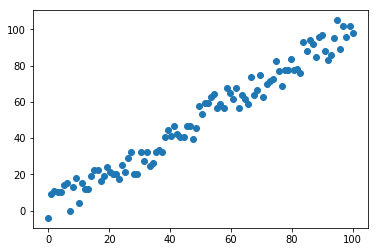

In [25]:
plt.scatter(X, Y)

## Using scikit for generating data

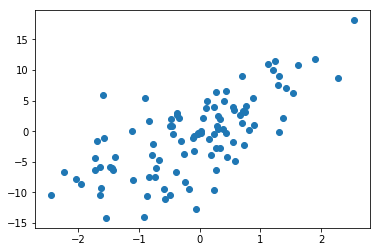

In [96]:
X, Y = make_regression(n_samples=100, n_features=1, noise=5)
plt.scatter(X, Y)
# print(Y.shape)


In [78]:
def hypo(theta, x):
    return x*theta[1] + theta[0]

def error(X, Y, theta):
    Yh = hypo(theta, X)
    return np.sum((Y-Yh)**2)

In [79]:


# print(error(X, Y, theta))

In [97]:
def grad_decent(X, Y, theta, lr):
    Yh = hypo(theta, X)
    
    print(Y.shape, Yh.shape)
    
    change_inter = (np.sum((Y - Yh) * 1)/X.shape[0]) * lr
    change_slop = (np.sum((Y - Yh) * X)/X.shape[0]) * lr
    
#     print(change_inter, change_slop)
    
    theta[0] += change_inter
    theta[1] += change_slop
    
    e = error(X, Y, theta)
    
    return theta, e
    

In [98]:
theta = np.array([0, 0])
for i in range(10):
    theta, e = grad_decent(X, Y, theta, .1)
    print(e)

(100,) (100, 1)
790199.4553898948
(100,) (100, 1)
32584476.271491073
(100,) (100, 1)
2824153095.5194216
(100,) (100, 1)
260921346592.3015
(100,) (100, 1)
25119380128321.777
(100,) (100, 1)
2497085250766411.0
(100,) (100, 1)
2.5415330048394586e+17
(100,) (100, 1)
2.6299048577377763e+19
(100,) (100, 1)
2.752041242868178e+21
(100,) (100, 1)
2.9013307732732758e+23
